In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augmentation

tf.test.is_gpu_available()

batchsize = 8

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    '/Users/air/Desktop/Prepared Data/train',
    target_size=(80, 80),
    batch_size=batchsize,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    '/Users/air/Desktop/Prepared Data/train',
    target_size=(80, 80),
    batch_size=batchsize,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/Users/air/Desktop/Prepared Data/test',
    target_size=(80, 80),
    batch_size=batchsize,
    class_mode='categorical'
)

# Load the ResNet50 model
bmodel = ResNet50(include_top=False, weights='imagenet', input_tensor=Input(shape=(80, 80, 3)))

# Custom head on top of ResNet50
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2, activation='softmax')(hmodel)

# Create the final model
model = Model(inputs=bmodel.input, outputs=hmodel)

# Freeze the ResNet50 layers
for layer in bmodel.layers:
    layer.trainable = False

model.summary()

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callbacks for training
checkpoint = ModelCheckpoint(
    '/Users/air/Desktop/Prepared Data/models/modelRES.keras',
    monitor='val_loss', 
    save_best_only=True, 
    verbose=3
)

earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data) // batchsize,
    validation_data=validation_data,
    validation_steps=len(validation_data) // batchsize,
    callbacks=callbacks,
    verbose=1  # Optional: Control the verbosity of output
)

# Evaluate on training data
acc_tr, loss_tr = model.evaluate(train_data)
print(f"Training accuracy: {acc_tr}, Training loss: {loss_tr}")

# Evaluate on validation data
acc_vr, loss_vr = model.evaluate(validation_data)
print(f"Validation accuracy: {acc_vr}, Validation loss: {loss_vr}")

# Evaluate on test data
acc_test, loss_test = model.evaluate(test_data)
print(f"Test accuracy: {acc_test}, Test loss: {loss_test}")


Found 63970 images belonging to 2 classes.
Found 15991 images belonging to 2 classes.
Found 4937 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 80, 80, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 86, 86, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 40, 40,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 40, 40,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 40, 40,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 42, 42,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 20, 20,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 20, 20,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 20, 20,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 20, 20,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 20, 20,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 20, 20,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 20, 20,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 20, 20,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 20, 20,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 20, 20,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 20, 20,    │      1,024 │ conv2_block1_3_c

 Total params: 24,767,554 (94.48 MB)

 Trainable params: 1,179,842 (4.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_179']. Received: the structure of inputs=*
  warnings.warn(


999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.5133 - loss: 0.7662
Epoch 1: val_loss improved from inf to 0.69264, saving model to /Users/air/Desktop/Prepared Data/models/modelRES.keras
999/999 ━━━━━━━━━━━━━━━━━━━━ 600s 574ms/step - accuracy: 0.5133 - loss: 0.7662 - val_accuracy: 0.5176 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 2/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.4878 - loss: 0.6935
Epoch 2: val_loss did not improve from 0.69264
999/999 ━━━━━━━━━━━━━━━━━━━━ 613s 614ms/step - accuracy: 0.4878 - loss: 0.6935 - val_accuracy: 0.5075 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 3/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5070 - loss: 0.6931
Epoch 3: val_loss did not improve from 0.69264
999/999 ━━━━━━━━━━━━━━━━━━━━ 637s 637ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 4/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.4915 - loss: 0.6932
Epoch 4: val_l

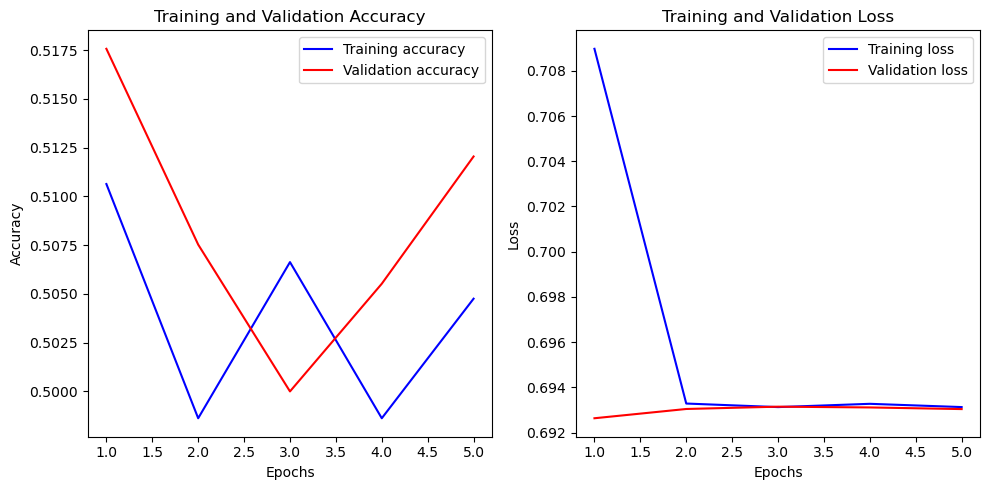

Learning rate was not logged during training.
618/618 ━━━━━━━━━━━━━━━━━━━━ 262s 405ms/step


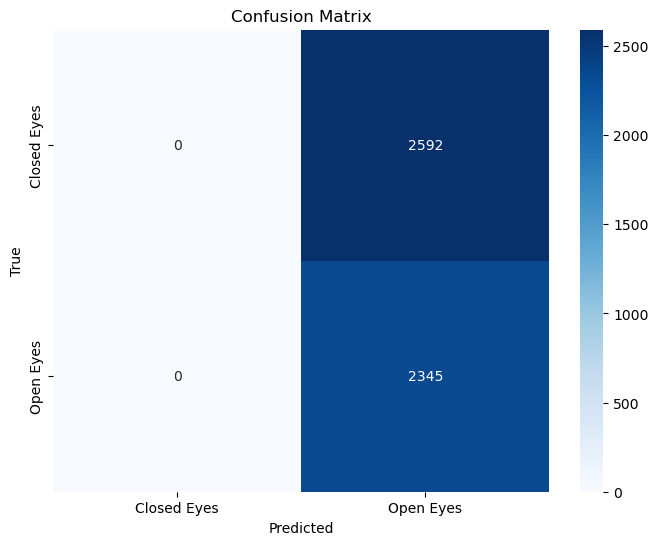

618/618 ━━━━━━━━━━━━━━━━━━━━ 231s 375ms/step


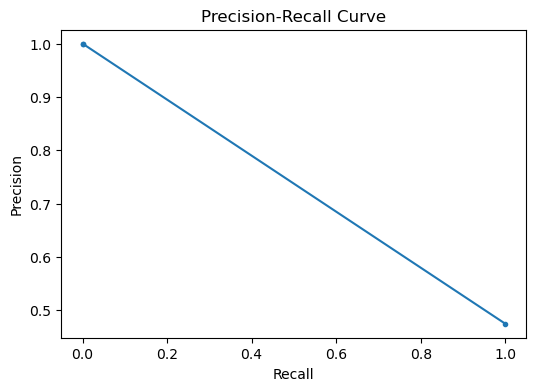

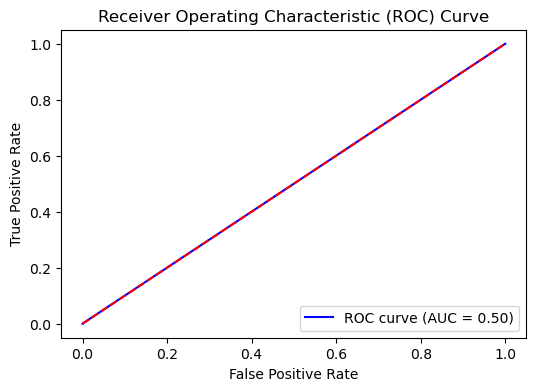

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


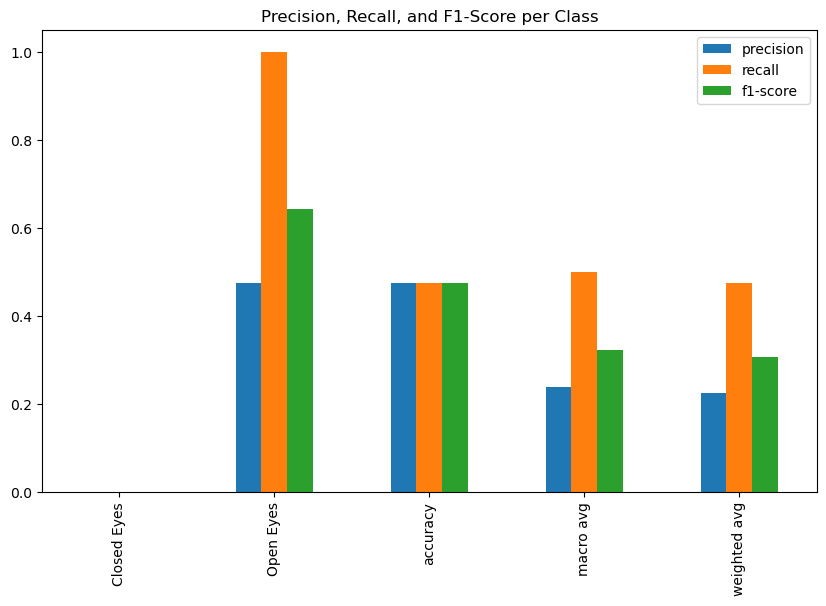

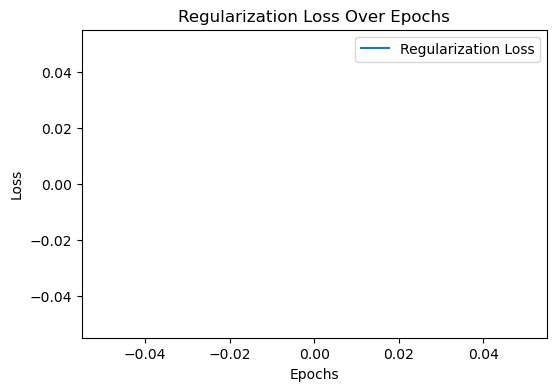

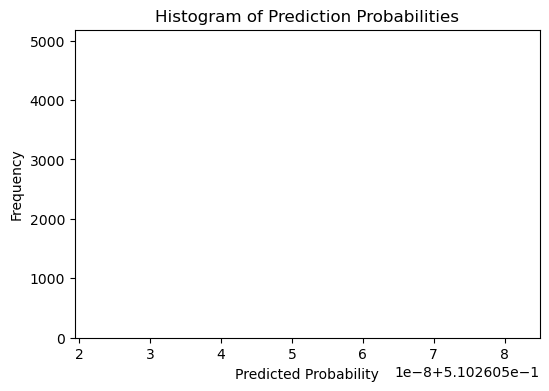

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, classification_report
import seaborn as sns
import pandas as pd

# 1. Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Learning Rate Schedule (only if logged)
if 'lr' in history.history:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()
else:
    print("Learning rate was not logged during training.")

# 3. Confusion Matrix
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Precision-Recall Curve
Y_prob = model.predict(test_data)
precision, recall, thresholds = precision_recall_curve(y_true, Y_prob[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_true, Y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 6. Precision, Recall, F1-Score per Class
report = classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys()), output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Precision, Recall, and F1-Score per Class')
plt.show()

# 7. Regularization Loss (if applicable)
regularization_losses = model.losses

plt.figure(figsize=(6, 4))
plt.plot(regularization_losses, label='Regularization Loss')
plt.title('Regularization Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Histogram of Prediction Probabilities
plt.figure(figsize=(6, 4))
plt.hist(Y_prob[:, 1], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Prediction Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


618/618 ━━━━━━━━━━━━━━━━━━━━ 277s 447ms/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


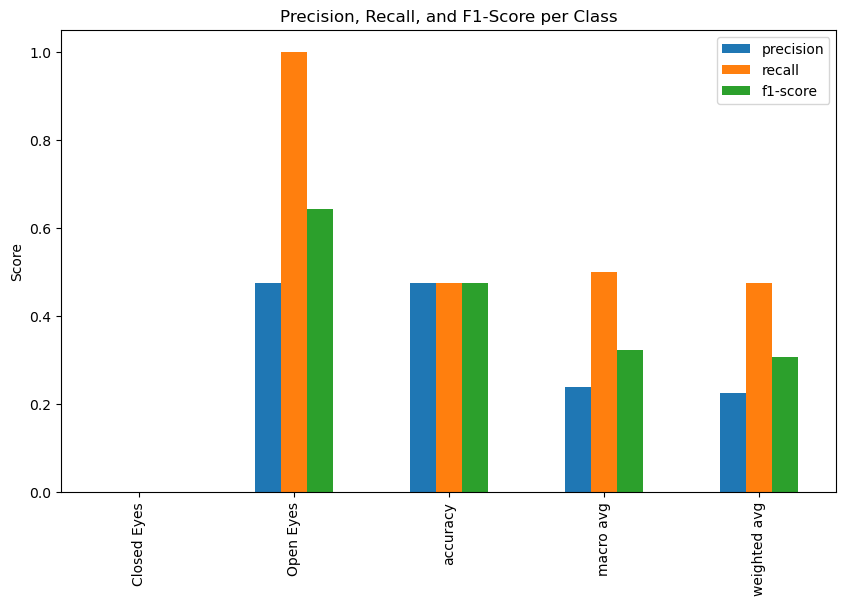

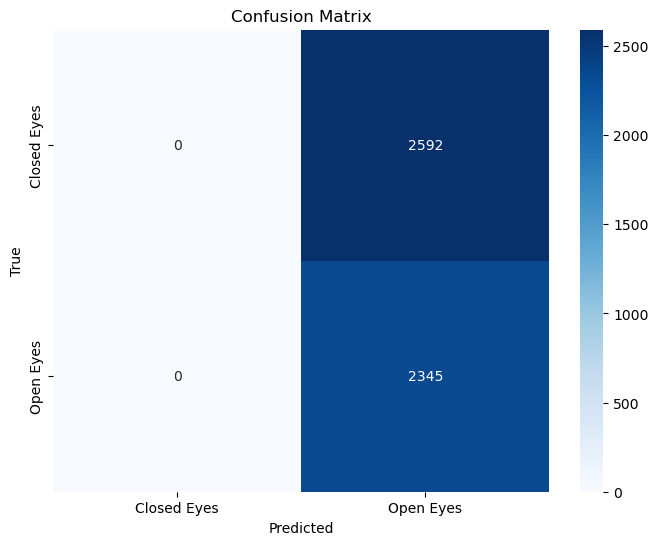

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Predictions on test data
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

# Classification report for precision, recall, F1-score
report = classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys()), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Precision, Recall, F1-score per class as bar plot
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Precision, Recall, and F1-Score per Class')
plt.ylabel('Score')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [22]:
# Gather metrics
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)

# Print the values directly
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Loss: {train_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


Training Accuracy: 0.5047547817230225
Training Loss: 0.6931304335594177
Validation Accuracy: 0.5120481848716736
Validation Loss: 0.6930415630340576
Test Accuracy: 0.4749847948551178
Test Loss: 0.6943848729133606
